### III. Scenario discovery with PRIM

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench.analysis import dimensional_stacking

from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
from ema_workbench import load_results
ema_logging.log_to_stderr(ema_logging.INFO)
# %matplotlib inline

<Logger EMA (DEBUG)>

In [20]:
experiments, outcomes = load_results('open_exploration_10k_4pol_3obj.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Mikhail\Python projects\Model-based decision-making\final assignment\open_exploration_10k_4pol_3obj.tar.gz


#### Preprocess results

In [21]:
n_policies = 4 # Number of policies that were under investigation

In [22]:
# List of policies is so: policy_0, policy_1, policy_2, policy_3

In [23]:
X = pd.DataFrame(experiments)
X = X.iloc[:,:-1] # Drop redundant column
policy = (X.policy == 'policy_2') # Select rows corresponding to a policy namely policy_0 corresponds to 0 policy, 
# policy_3 to 4d policy (final one)
X = X[X['policy'] == 'policy_2']
n_experiments = X.shape[0]
X = X.to_records(index=False)

In [24]:
# Here n = 1 is policy_0, n = 2 is policy_2, etc.
n = 3 # Select number of policy
l = int(len(experiments) / n_policies) # An index to slash dataframe

In [25]:
pd.DataFrame(outcomes).iloc[int(l * (n - 1)):int(l * n),:].head() # Test

,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
20000,1.375710e+07,2.122605e+08,0.007436
20001,4.281128e+07,2.122605e+08,0.027619
20002,4.404641e+06,2.122605e+08,0.002186
20003,9.707933e+05,2.122605e+08,0.000625
20004,2.210717e+06,2.122605e+08,0.001129


In [26]:
# Check statistics of the given policy
pd.DataFrame(outcomes).iloc[int(l * (n - 1)):int(l * n),:].describe() 

,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
count,1.000000e+04,1.000000e+04,10000.000000
mean,1.390367e+07,2.122605e+08,0.008110
std,1.603595e+07,3.138341e-05,0.014695
min,0.000000e+00,2.122605e+08,0.000000
25%,2.274390e+06,2.122605e+08,0.001645
50%,8.158120e+06,2.122605e+08,0.004147
75%,2.139724e+07,2.122605e+08,0.011557
max,5.537087e+08,2.122605e+08,1.041409


C:\Users\Mikhail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


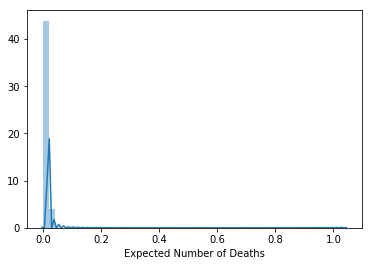

In [27]:
# Check distribution of Expected Number of Deaths under the given policy
sns.distplot(pd.DataFrame(outcomes).iloc[int(l * (n - 1)):int(l * n),:]['Expected Number of Deaths'])

In [28]:
# Set up the threshold for 'Expected Number of Deaths'
# Therefore we will identify cases where our policies are failing
threshold = 0.009

In [29]:
y = pd.DataFrame(outcomes)
y = (y[policy]['Expected Number of Deaths'] > 
     threshold).astype(int) # Slice by threshold
y = y.reset_index(drop = True)

In [30]:
print('The number of failures', n_experiments - y.sum(), 'out of', n_experiments, 'experiments')
print('The number of successes', y.sum(), 'out of', n_experiments, 'experiments')
print('The percentage of successful cases under the given policy', round(100 - ((n_experiments - y.sum()) / n_experiments) * 100, 2))

The number of failures 6498 out of 10000 experiments
The number of successes 3502 out of 10000 experiments
The percentage of successful cases under the given policy 35.02


#### Run PRIM

In [31]:
prim_alg = prim.Prim(X, y, threshold=0.8, peel_alpha = 0.05)
box1 = prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 3502 cases of interest
C:\Users\Mikhail\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] mean: 1.0, mass: 0.1493, coverage: 0.4263278126784694, density: 1.0 restricted_dimensions: 4


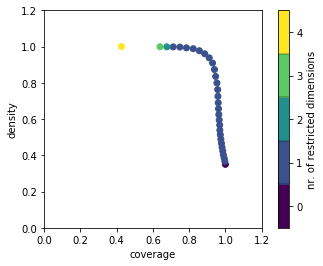

In [32]:
# %matplotlib notebook
box1.show_tradeoff()
plt.show()

coverage    0.929183
density     0.909193
mass          0.3579
mean        0.909193
res dim            1
Name: 20, dtype: object

             box 20                    
                min       max qp values
A.4_pfail  0.000066  0.357938     [0.0]



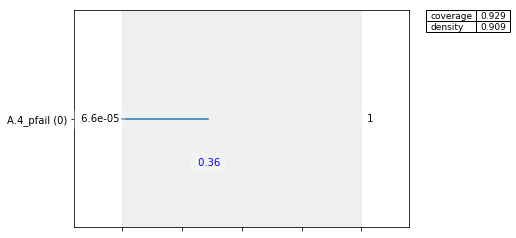

In [33]:
%matplotlib inline
box1.inspect(20)
box1.inspect(20, style='graph')
plt.show()

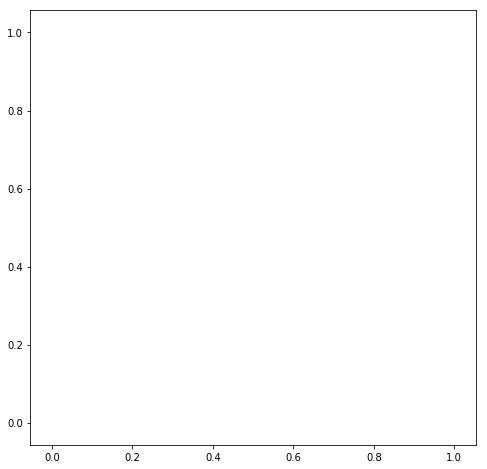

In [34]:
box1.select(20)
fig = box1.show_pairs_scatter()
fig.set_size_inches(8,8)
plt.show()

#### Dimensional stacking

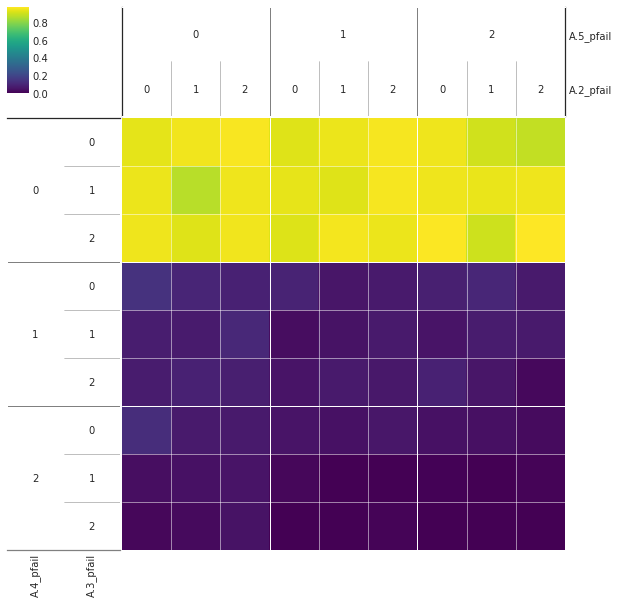

In [35]:
# Define the number of levels
nr_levels = 2
dimensional_stacking.create_pivot_plot(X,y, nr_levels=nr_levels)
plt.show()